# Calculating the Return of a Portfolio of Securities

### Importando as bibliotecas

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

### Download de dados para um portfólio composto por 6 ações. Faça isso para Lojas Americanas, Engie, Weg, Itaú, Localiza e Renner  no período ‘2019-07-28’ até a data atual.

In [3]:
tickers = ['LAME4.SA', 'EGIE3.SA','WEGE3.SA', 'ITSA4.SA', 'RENT3.SA', 'LREN3.SA']
carteira = pd.DataFrame()
for t in tickers:
    carteira[t] = wb.DataReader(t, data_source='yahoo', start='2019-07-28')['Adj Close']

### Conferindo se todas as ações possuem dados de negociação na data inicial.

In [4]:
carteira.head(10)

,LAME4.SA,EGIE3.SA,WEGE3.SA,ITSA4.SA,RENT3.SA,LREN3.SA
Date,,,,,,
2019-07-29,17.042910,43.252815,11.598355,11.925572,41.082081,47.138927
2019-07-30,16.974741,43.538021,11.804943,11.732778,41.269672,47.255714
2019-07-31,17.675934,43.021095,11.716404,11.448182,41.269672,46.185249
2019-08-01,18.367388,42.869576,11.524575,11.521626,42.095066,47.508728
2019-08-02,18.445297,43.074566,11.677056,11.439002,42.873558,48.365086
2019-08-05,17.724627,42.245701,11.460632,11.255391,41.363461,47.323833
2019-08-06,17.870707,43.226086,11.755754,11.622614,42.113819,49.046288
2019-08-07,17.442202,42.245701,11.957421,11.925572,40.791313,48.705692
2019-08-08,17.529850,42.334820,12.021366,12.044918,42.207615,49.163067


### Normalização de dados para base 100

In [5]:
carteira.iloc[0]

LAME4.SA    17.042910
EGIE3.SA    43.252815
WEGE3.SA    11.598355
ITSA4.SA    11.925572
RENT3.SA    41.082081
LREN3.SA    47.138927
Name: 2019-07-29 00:00:00, dtype: float64

### Plotando os dados das 6 ações no gráfico

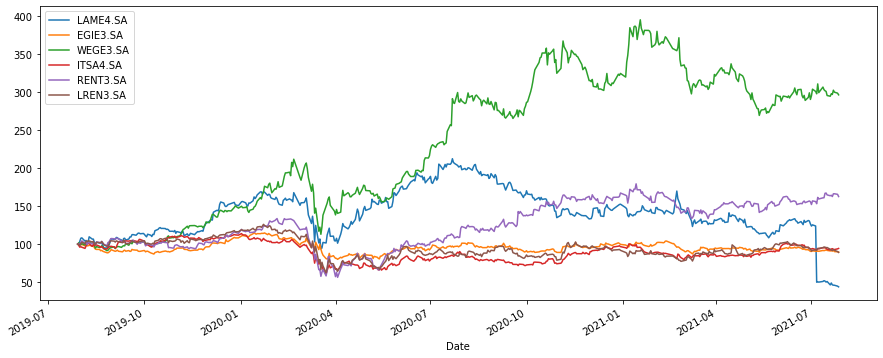

In [6]:
(carteira / carteira.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

### Criando uma matrix numpy para calcular os retornos dos ativos da carteira

In [7]:
retornos = (carteira / carteira.shift(1)) - 1
retornos.tail(10)

,LAME4.SA,EGIE3.SA,WEGE3.SA,ITSA4.SA,RENT3.SA,LREN3.SA
Date,,,,,,
2021-07-14,-0.011241,0.003540,-0.004832,0.001764,0.036421,-0.002865
2021-07-15,-0.024633,0.007811,-0.002571,-0.007922,0.001896,-0.005968
2021-07-16,0.015056,-0.008000,-0.018041,-0.014197,-0.014699,0.001334
2021-07-19,-0.087760,-0.007308,-0.003208,-0.008101,-0.006647,-0.023984
2021-07-20,0.054430,0.002285,0.010825,0.011797,0.003717,-0.010239
2021-07-21,-0.051621,-0.004813,-0.002894,0.006278,-0.010222,-0.007126
2021-07-22,-0.007595,0.009926,0.018868,-0.011586,0.022302,0.015281
2021-07-23,-0.002551,-0.017137,-0.008547,-0.000902,0.000293,-0.012315
2021-07-26,-0.025575,-0.002564,-0.004310,0.009025,-0.004391,-0.017779


### Criando variável peso da carteira em que atribui os pesos para cada ativo da carteira. A soma dos pesos deve ser igual a 1

In [10]:
peso_carteira = np.array([0.10, 0.15, 0.15, 0.15, 0.20, 0.25])

### Calculando os retornos anuais da carteira de ativos.

In [12]:
retornos_anuais = retornos.mean()*250
print (retornos_anuais)

LAME4.SA   -0.114057
EGIE3.SA   -0.011563
WEGE3.SA    0.666661
ITSA4.SA    0.036094
RENT3.SA    0.418297
LREN3.SA    0.070113
dtype: float64


### Estimando o produto do retorno da carteira de ativos.

In [13]:
np.dot(retornos_anuais, peso_carteira)

0.19346081752855676

### Convertendo o retorno da carteira para um valor percentual

In [14]:
pfolio_1 = str(round(np.dot(retornos_anuais, peso_carteira), 5) * 100) + ' %'
print (pfolio_1)

19.346 %


### Calculando o retorno de uma segunda carteira, com os mesmos ativos, porém, diferentes pesos

In [15]:
peso_carteira_2 = np.array([0.15, 0.20, 0.15, 0.20, 0.15, 0.15])

### Estimando o produto do retorno da segunda carteira de ativos.

In [16]:
np.dot(retornos_anuais,peso_carteira_2)

0.16105831569991738

### Comparação dos retornos entre os dois portfólios

In [17]:
pfolio_2 = str(round(np.dot(retornos_anuais,peso_carteira_2), 5) * 100) + ' %'
print (pfolio_1)
print (pfolio_2)

19.346 %
16.106 %
